## Start by importing all necessary packages

In [210]:
import matplotlib.cm as cm
import numpy as np
import scipy.optimize
import scipy.linalg as spl
import matplotlib.pyplot as plt
import time

## First, we compute the Rosenbrock function to plot it 

In [212]:
axis = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(axis, axis)
Z = scipy.optimize.rosen((X, Y))   # returns a scalar for each of the two element vectors x,y
Z = np.log(Z)

initial_point = (-2,-2)            # where gradient descent starts
print(X.shape)
print(Z.shape)

(100, 100)
(100, 100)


## Here is a very simple implementation of Gradient Descent

In [117]:
# customized function to be passed as method to scipy.optimize.minimize()
# The method shall return an OptimizeResult type object
def gradient_descent(fun, x0, jac, args=(), alpha=0.0002, tol=1e-8, callback=None, maxiter=10000, **options):
    """Implements simple gradient descent"""
    x = x0
    num_iter = 0
  
    while num_iter < maxiter:
        num_iter += 1
        # the next 2 lines are gradient descent
        step = alpha *jac(x)    # jacobian, alpha = steplength 
        x = x - step
        
        if callback is not None:
            callback(x)           # below: appending tuple / new coordinates to trace list
        # convergence criteria
        if spl.norm(step) < tol:
            break

    # note that gradient descent never actually evaluates the function itself only the gradient
    return scipy.optimize.OptimizeResult(fun=fun(x), x=x, nit=num_iter,
                              nfev=num_iter, success=(num_iter > 1))


## A little helper function to ease the plotting

Called without any arguments, it will simply produce a contourplot of the (log of the) function we are interested in.

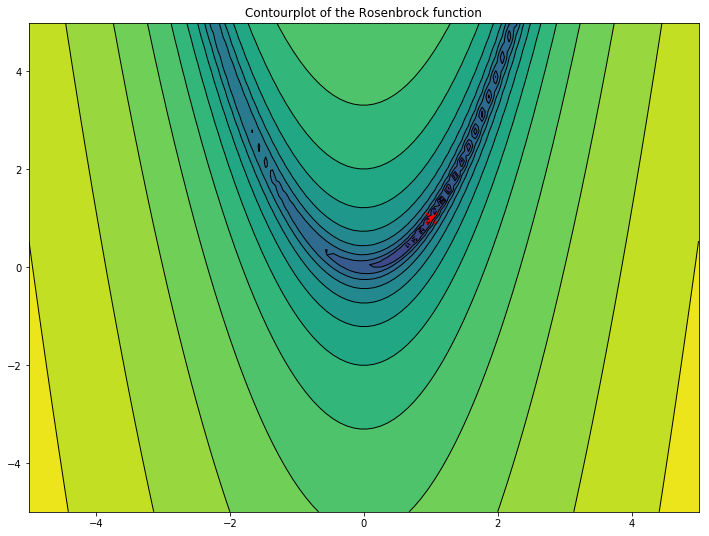

In [182]:
# uses public X,Y,Z as defined above
def plot_trace(trace=[], name=None, num_evals=None, time=-1, nfev=0, njev=0, nhev=0):
    """ Convenience function to plot the interesting region and the trace of the optimizers"""
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.contourf(X, Y, Z, 16, origin='lower')#, cmap=cm.get_cmap('winter'))
    ax.contour(X, Y, Z, 16,  colors=('k',),  linewidths=(1,), origin='lower')
    ax.scatter(1, 1, marker='x', color='red', s=120, linewidth=3)
    plt.plot(*zip(*trace), color='k', lw=3)
    if name is None:
        plt.title('Contourplot of the Rosenbrock function')
    else:
        plt.title("Trace of {}, which took {} steps, and {:.3f} seconds'% \n \
        function calls: objective function: {}, jacobian {}, hessian {}".format(name, num_evals, time, nfev, njev, nhev))
    plt.show()
    
plot_trace()   # here without trace

## Now we can finally run our gradient descent.

We will directly use the scipy.optimize interface which can use user-defined functions for the optimization.
Note how we use scipy.optimize.rosen_der which is the gradient of the Rosenbrock function.
We use the callback functionality to store evaluated points to plot them later.

Feel free to experiment with different steplength (change alpha above), and values for tol (the tolerance for the stopping criteria) to see how quickly the method converges.

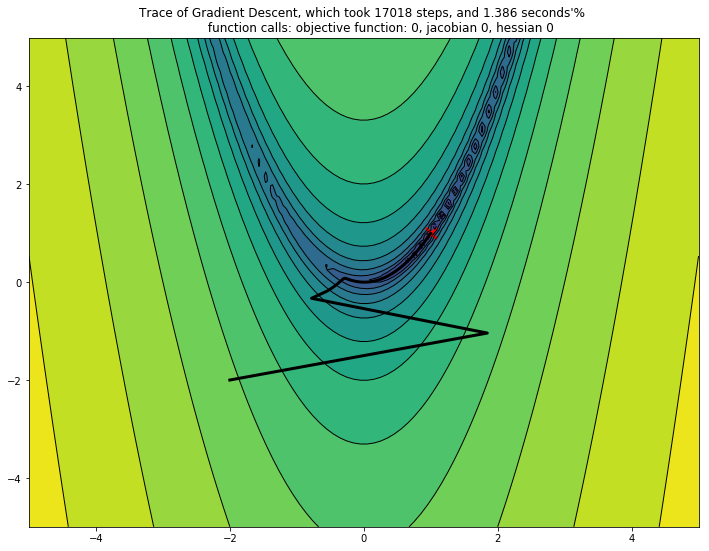

In [183]:
trace = []    # initialise list
trace.append(initial_point)
def callback(xk):
    trace.append(xk)    # append next tuple of 2 points
t0 = time.time()
res = scipy.optimize.minimize(       # returns "OptimizeResult result object, a kind of dict
    method=gradient_descent,         # defined above, returns scipy.optimize.OptimizeResult()
    fun=scipy.optimize.rosen,        # objective function, 
    x0=initial_point,                # 
    jac=scipy.optimize.rosen_der,    # jacobian / gradient
    callback=callback,               # pass callback function "callback", which updates trace
    tol=1e-6,                        # Tolerance for termination /when to stop, if 
    options={'maxiter': 40000, 'alpha': 0.0008}, # pass parameters to gradient descent fucntion called
)
t1 = time.time()
# print("trace {}".format(trace))
plot_trace(trace, 'Gradient Descent', res.nfev, t1-t0)   # res.nefev number of evaluations performed

# Now it's your turn:

Run the following optimizers from scipy on the Rosenbrock function:
- Nelder-Mead
- Powell
- CG
- Newton-CG
- L-BFGS-B
Capture the points they evaluate by using a callback as shown above. You can use the scipy implementation of the Rosenbrock function and its derivatives to minimize any potential for typos.

Please print out the plots to hand in with the rest of the assignment.

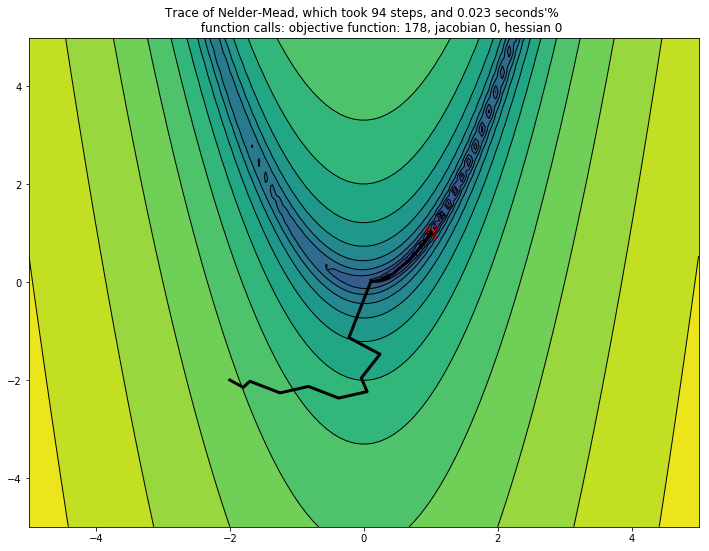

In [205]:
def test_optimizer(method, maxiter):

    trace = []    # initialise list
    trace.append(initial_point)
    def callback(xk):
        trace.append(xk)                 # append next tuple of 2 points
    
    t0 = time.time()
    res = scipy.optimize.minimize(       # returns "OptimizeResult result object, a kind of dict
        method=method,            # defined above, returns scipy.optimize.OptimizeResult()
        fun=scipy.optimize.rosen,        # objective function, 
        x0=initial_point,                # 
        jac=scipy.optimize.rosen_der,    # jacobian / gradient
        hess=scipy.optimize.rosen_hess,  # hessian matrix 
        callback=callback,               # pass callback function "callback", which updates trace
        tol=1e-6,                        # Tolerance for termination /when to stop, if 
        options={'maxiter': maxiter, 'disp': False}, # pass parameters to gradient descent fucntion called
    )
    t1 = time.time()
    njev, nhev = 0, 0
    try:
        njev = res.njev
        nhev = res.nhev
    except:
        pass

    plot_trace(trace, method, res.nit, t1-t0, res.nfev, njev, nhev)   # res.nefev number of evaluations performed

test_optimizer('Nelder-Mead', 1000)

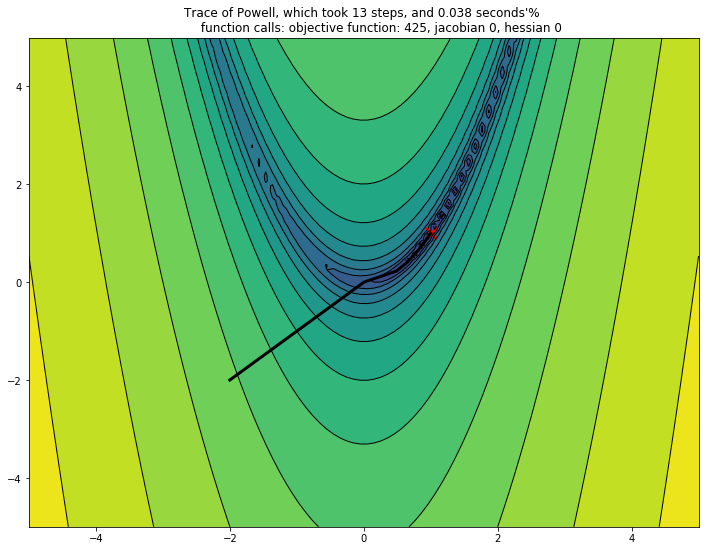

In [206]:
test_optimizer('Powell', 1000)

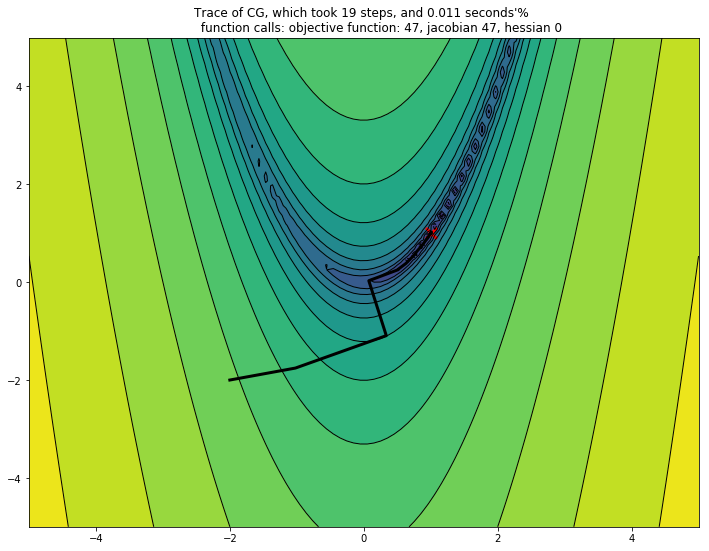

In [207]:
test_optimizer('CG', 1000)

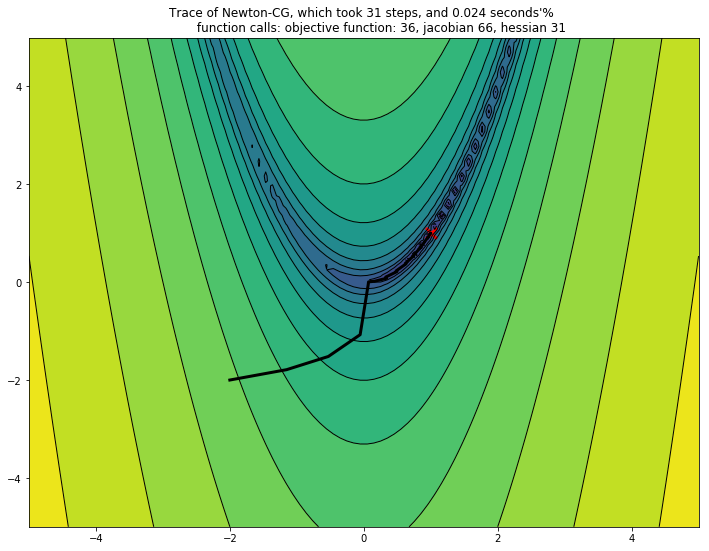

In [208]:
test_optimizer('Newton-CG', 1000)

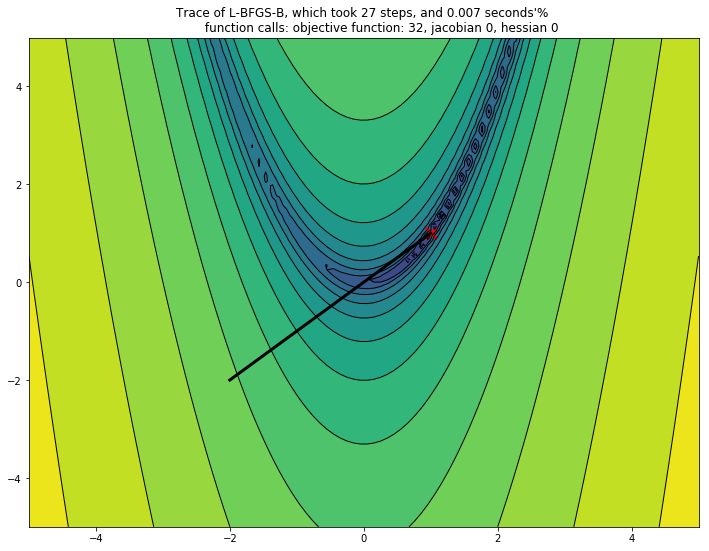

In [209]:
test_optimizer('L-BFGS-B', 1000)